# Object Detection / Optical Character Recognition (ORC) 

● Implement an object detector which identifies the classes of the objects in 
an image or video. 

OR

● Character detector which extracts printed or handwritten text from an 
image or video.

● Below resources are just for references you can use any library/approach 
to achieve the goal.

● Resources:

1- https://pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

2- https://medium.com/capital-one-tech/learning-to-read-computer-vision-methods-for-extracting-text-from-images-2ffcdae11594 

-----------------------------

* MobileNets was designed for resource constrained devices.

* It is efficient and has a small size.

* Combination between MobileNets and Single Shot Detectors gives fast and efficient deep-learning based object detection.

* The MobileNet SSD was first trained on the COCO dataset then fine-tuned on PASCAL VOC reaching 72.7% mAP.

* It detects 20 objects in images (+1 for the background class), including airplanes, bicycles, birds, boats, bottles, buses, cars, cats, chairs, cows, dining tables, dogs, horses, motorbikes, people, potted plants, sheep, sofas, trains, and tv monitors.


## Object detection with deep learning and OpenCV

In [1]:
# import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# The list of class labels MobileNet SSD was trained to detect
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
            "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
            "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
            "sofa", "train", "tvmonitor"]

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3)) # shape(20,3)

print("Classes:\n", CLASSES, "\n")
print("Colors:\n ", COLORS, "\n")

Classes:
 ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] 

Colors:
  [[116.76532565  69.58874174  86.39171675]
 [106.78229404  26.26245988 220.44064264]
 [ 94.63466025 212.62130009 225.48276923]
 [129.23921519  82.98077115 136.56661183]
 [225.77983384 140.52341472 225.93875781]
 [115.3792317  121.99382009 196.18964783]
 [103.64708986 223.54106587 143.20083776]
 [109.50307127 165.97757309 243.49666632]
 [ 10.38016028 252.48514125 145.92865285]
 [102.23152427 202.54802787 235.46272421]
 [164.61284564 143.52269845 239.41167515]
 [114.71936015  26.04607337  30.52065659]
 [187.346738     8.05743056  11.80034693]
 [117.46098096 122.59479982 148.77012833]
 [234.50358706 173.6465858  222.28897035]
 [119.82154553 154.50459787 110.77530017]
 [ 26.13957854  26.75528626  18.3685783 ]
 [254.04910506   9.07980012  51.98548411]
 [101.403555

In [3]:
proto_file = os.path.abspath('MobileNetSSD_deploy.prototxt.txt') #Contain a list of the network layers in the model.
model_file = os.path.abspath('MobileNetSSD_deploy.caffemodel') #This file contains the weights of the model.
#Create the model.
net = cv2.dnn.readNetFromCaffe(proto_file, model_file)

In [4]:
# Scaling parameters.

input_shape=(300,300) # The required shape for the input image to pass to our model.

mean = (127.5,127.5,127.5) # Normalize the image pixels.

scale = 0.007843 # Scale the image to meet the input criteria of the model.

In [5]:
# Image preprocessing.
img = cv2.imread('image_1.jpg')
# img = cv2.imread('image_2.jpeg')
# img = cv2.imread('image_3.jpeg')

#Blob analysis is image processing's most basic method for analyzing the shape features of an object, 
#such as the presence, number, area, position, length, and direction of lumps.
blob = cv2.dnn.blobFromImage(img, scalefactor=scale, size=input_shape, mean=mean, swapRB=True) 
# Image is already in the BGR form because opencv by default reads it in BGR format.

In [6]:
img.shape

(194, 259, 3)

In [7]:
img

array([[[239, 220, 205],
        [239, 220, 205],
        [240, 221, 206],
        ...,
        [232, 210, 199],
        [232, 210, 199],
        [232, 210, 199]],

       [[239, 220, 205],
        [239, 220, 205],
        [239, 220, 205],
        ...,
        [232, 210, 199],
        [232, 210, 199],
        [232, 210, 199]],

       [[238, 219, 204],
        [238, 219, 204],
        [239, 220, 205],
        ...,
        [234, 209, 199],
        [234, 209, 199],
        [234, 209, 199]],

       ...,

       [[108,  92,  76],
        [107,  91,  75],
        [106,  90,  74],
        ...,
        [106,  89,  76],
        [106,  89,  76],
        [106,  89,  76]],

       [[101,  85,  69],
        [101,  85,  69],
        [101,  85,  69],
        ...,
        [106,  90,  74],
        [106,  90,  74],
        [106,  90,  74]],

       [[101,  85,  69],
        [101,  85,  69],
        [101,  85,  69],
        ...,
        [100,  84,  67],
        [100,  84,  67],
        [100,  84,  67]]

In [8]:
blob.shape

(1, 3, 300, 300)

In [9]:
blob

array([[[[ 0.6078325 ,  0.6078325 ,  0.6156755 , ...,  0.5607745 ,
           0.5607745 ,  0.5607745 ],
         [ 0.6078325 ,  0.6078325 ,  0.6078325 , ...,  0.5607745 ,
           0.5607745 ,  0.5607745 ],
         [ 0.6078325 ,  0.6078325 ,  0.6078325 , ...,  0.5607745 ,
           0.5607745 ,  0.5607745 ],
         ...,
         [-0.4509725 , -0.4509725 , -0.4588155 , ..., -0.4196005 ,
          -0.4196005 , -0.4196005 ],
         [-0.4588155 , -0.4588155 , -0.4588155 , ..., -0.4509725 ,
          -0.4509725 , -0.4509725 ],
         [-0.4588155 , -0.4588155 , -0.4588155 , ..., -0.4745015 ,
          -0.4745015 , -0.4745015 ]],

        [[ 0.7254775 ,  0.7254775 ,  0.7333205 , ...,  0.6470475 ,
           0.6470475 ,  0.6470475 ],
         [ 0.7254775 ,  0.7254775 ,  0.7254775 , ...,  0.6470475 ,
           0.6470475 ,  0.6470475 ],
         [ 0.7254775 ,  0.7254775 ,  0.7254775 , ...,  0.6470475 ,
           0.6470475 ,  0.6470475 ],
         ...,
         [-0.32548448, -0.32548448

In [10]:
# Model input
net.setInput(blob)

# Model output
results = net.forward()

In [11]:
results.shape
#1,1 tell us number of images we are currently working on.
#100 is the numbers of the assumed detected objects.
#7 is vector of 7 values [Image number, Class, Confidence score (0 to 1), StartX, StartY, EndX, EndY].

(1, 1, 100, 7)

In [12]:
results

array([[[[0.        , 4.        , 0.9992661 , 0.1969516 , 0.19366355,
          0.79283667, 0.67600906],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.       

In [13]:
print(results[0,0,0,:])

[0.         4.         0.9992661  0.1969516  0.19366355 0.79283667
 0.67600906]


In [14]:
# 3-6 contains the coordinate of the border.
x1, y1, x2, y2 = results[0, 0, 0, 3:7] 
print(x1,y1,x2,y2)

0.1969516 0.19366355 0.79283667 0.67600906


In [15]:
print(results[0, 0, 0, 2])
print(round(results[0, 0, 0, 2],2))

0.9992661
1.0


In [16]:
int(results[0, 0, 0, 1])

4

In [17]:
for i in range(results.shape[2]):
    # confidence
    confidence = round(results[0, 0, i, 2],2)
    if confidence > 0.3:
        # class id
        id = int(results[0, 0, i, 1]) 
         
        # 3-6 contains the coordinate
        x1, y1, x2, y2 = results[0, 0, i, 3:7] 
        
        # scale these coordinates to out image pixel
        ih, iw, ic = img.shape
        x1, x2 = int(x1*iw), int(x2*iw)
        y1, y2 = int(y1 * ih), int(y2 * ih)
        
        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[id], confidence * 100)
        print("Class: {}".format(label))
        cv2.rectangle(img,(x1, y1),(x2, y2),COLORS[id], 2)
        cv2.putText(img, f'{CLASSES[id]}:{round(confidence*100,2)}',(x1+30, y1-20),cv2.FONT_HERSHEY_DUPLEX,0.7, COLORS[id], 1)
    
img = cv2.resize(img, (640, 640))
cv2.imshow('Image', img)
# cv2.imwrite('output1.jpg',img) # Uncomment this line to save the output
cv2.waitKey(5000)
cv2.destroyAllWindows() 

Class: boat: 100.00%


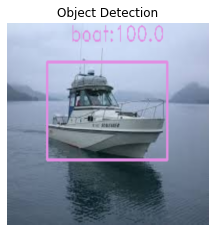

In [18]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Object Detection')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()